# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Rangga Djatikusuma Lukman
- **Email:** djatikusuma.data@gmail.com
- **ID Dicoding:** djatikusuma

## Menentukan Pertanyaan Bisnis

- Faktor lingkungan apa saja yang paling berpengaruh terhadap tingkat PM2.5?
- Bagaimana tren kualitas udara (PM2.5) di wilayah ini, dan apakah terdapat pola musiman yang signifikan?

## Import Semua Packages/Library yang Digunakan

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style for seaborn
sns.set_style("whitegrid")

## Data Wrangling

### Gathering Data

In [74]:
data = pd.read_csv('/data/PRSA_Data_Shunyi_20130301-20170228.csv')

**Insight:**
- Dataset memuat data polutan udara (PM2.5, PM10, SO2, dll.) dan beberapa faktor lingkungan (suhu, tekanan udara, kelembaban, dsb.)
- Informasi waktu tersebar dalam kolom year, month, day, dan hour

### Assessing Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


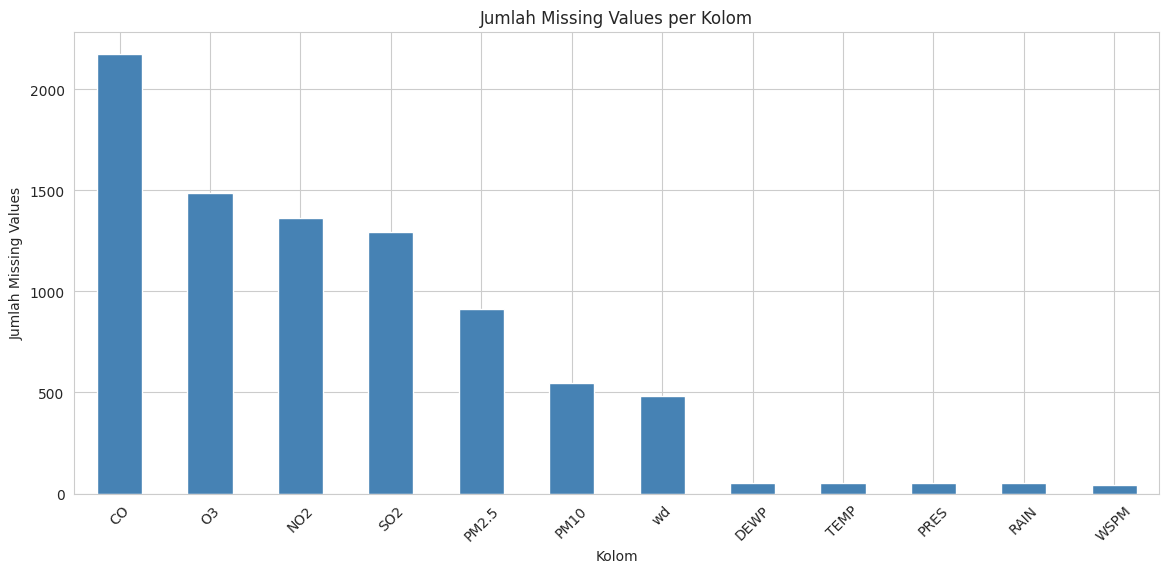

In [75]:
# Melihat informasi umum dataset
data.info()

# Mengecek jumlah missing values
missing_values = data.isnull().sum()

# Membuat dataframe untuk visualisasi
missing_df = pd.DataFrame({
    'Missing Values': missing_values
})

# Menyaring kolom yang memiliki missing values
missing_df = missing_df[missing_df['Missing Values'] > 0]

# Visualisasi menggunakan bar plot
plt.figure(figsize=(14, 6))
missing_df.sort_values(by='Missing Values', ascending=False, inplace=True)
missing_df['Missing Values'].plot(kind='bar', color='steelblue')
plt.title('Jumlah Missing Values per Kolom')
plt.xlabel('Kolom')
plt.ylabel('Jumlah Missing Values')
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Beberapa kolom memiliki missing values, terutama pada kolom PM2.5 dan PM10, yang perlu ditangani
- Data waktu (tahun, bulan, hari, dan jam) perlu dikombinasikan untuk analisis tren

### Cleaning Data

In [76]:
# Menggabungkan kolom waktu
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])

# Menghapus kolom yang tidak perlu
data.drop(columns=['year', 'month', 'day', 'hour', 'No', 'station'], inplace=True)

# Mengisi missing values hanya pada kolom numerik dengan rata-rata kolom
data.fillna(data.mean(numeric_only=True), inplace=True)

summary_statistics = data.describe()
summary_statistics

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064
mean,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533,2015-03-01 11:30:00
min,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000,2013-03-01 00:00:00
25%,20.000000,32.000000,2.000000,20.000000,500.000000,11.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000,2014-03-01 05:45:00
50%,57.000000,79.000000,5.140800,39.000000,900.000000,47.000000,14.400000,1012.800000,3.000000,0.000000,1.500000,2015-03-01 11:30:00
75%,109.000000,137.000000,16.000000,61.000000,1500.000000,76.000000,23.200000,1021.000000,15.100000,0.000000,2.300000,2016-02-29 17:15:00
max,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000,2017-02-28 23:00:00
std,80.167173,88.444361,19.206951,30.387486,1119.883237,53.695941,11.475233,10.169935,13.716048,0.761114,1.287009,NaN


**Insight:**
- Data telah dibersihkan dengan menggabungkan kolom waktu dan mengisi nilai yang hilang dengan rata-rata
- Struktur data sudah lebih siap untuk analisis lanjutan

## Exploratory Data Analysis (EDA)

### Explore distribusi data PM2.5

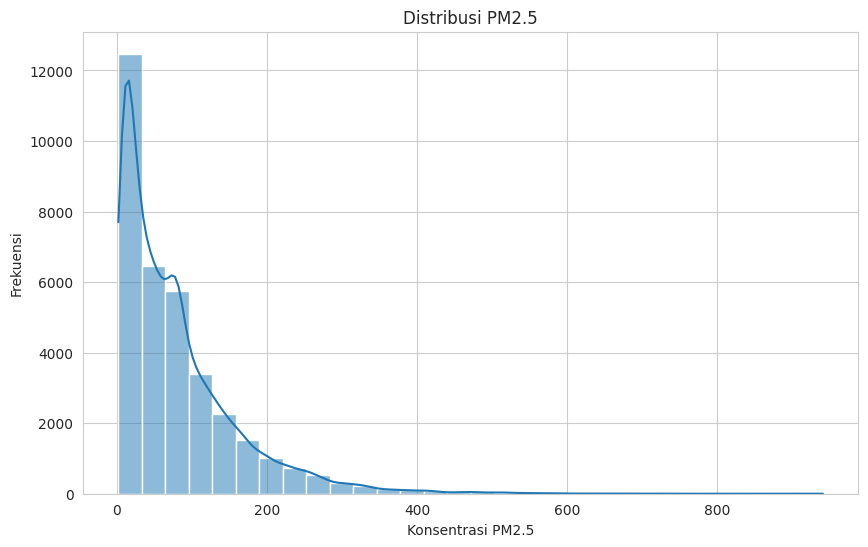

In [77]:
# Melihat distribusi data PM2.5
plt.figure(figsize=(10, 6))
sns.histplot(data['PM2.5'], bins=30, kde=True)
plt.title('Distribusi PM2.5')
plt.xlabel('Konsentrasi PM2.5')
plt.ylabel('Frekuensi')
plt.show()

**Insight:**
- Distribusi PM2.5 menunjukkan adanya polutan tinggi pada waktu tertentu
- Distribusi yang tinggi pada konsentrasi PM2.5 mungkin menunjukkan polusi udara yang sering terjadi

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Correlations with Weather Conditions: TEMP    -0.114435
PRES    -0.002340
DEWP     0.123126
RAIN    -0.006600
PM2.5    1.000000
Name: PM2.5, dtype: float64


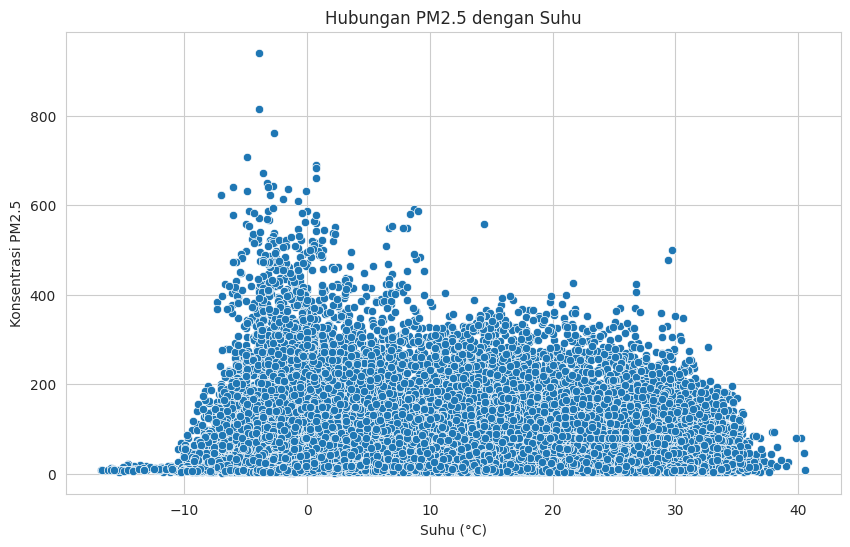

In [78]:
# Visualisasi hubungan antara PM2.5 dan suhu
weather_correlations = data[['TEMP', 'PRES', 'DEWP', 'RAIN', 'PM2.5']].corr()['PM2.5']
print("Correlations with Weather Conditions:", weather_correlations)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='TEMP', y='PM2.5', data=data)
plt.title('Hubungan PM2.5 dengan Suhu')
plt.xlabel('Suhu (°C)')
plt.ylabel('Konsentrasi PM2.5')
plt.show()

### Pertanyaan 2:

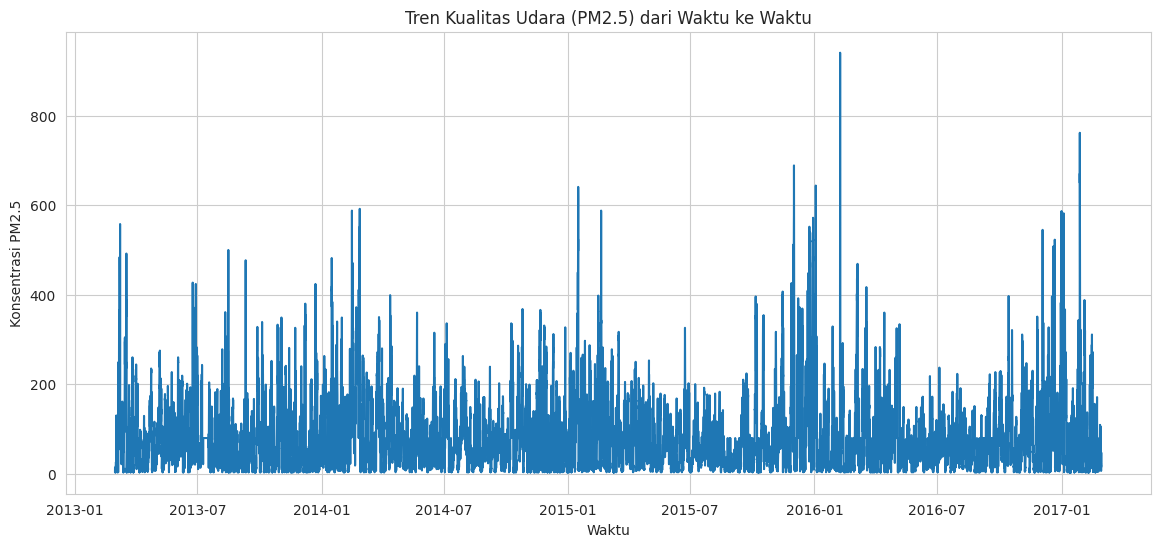

In [79]:
# Visualisasi tren PM2.5 dari waktu ke waktu
plt.figure(figsize=(14, 6))
sns.lineplot(x='datetime', y='PM2.5', data=data)
plt.title('Tren Kualitas Udara (PM2.5) dari Waktu ke Waktu')
plt.xlabel('Waktu')
plt.ylabel('Konsentrasi PM2.5')
plt.show()

**Insight:**
- Terlihat adanya pola tertentu antara suhu dan PM2.5. Kualitas udara kemungkinan dipengaruhi oleh suhu lingkungan
- Tren data menunjukkan adanya peningkatan atau penurunan polutan pada waktu-waktu tertentu, menunjukkan potensi adanya pola musiman

## Analisis Lanjutan (Opsional)

### Clustering Analysis

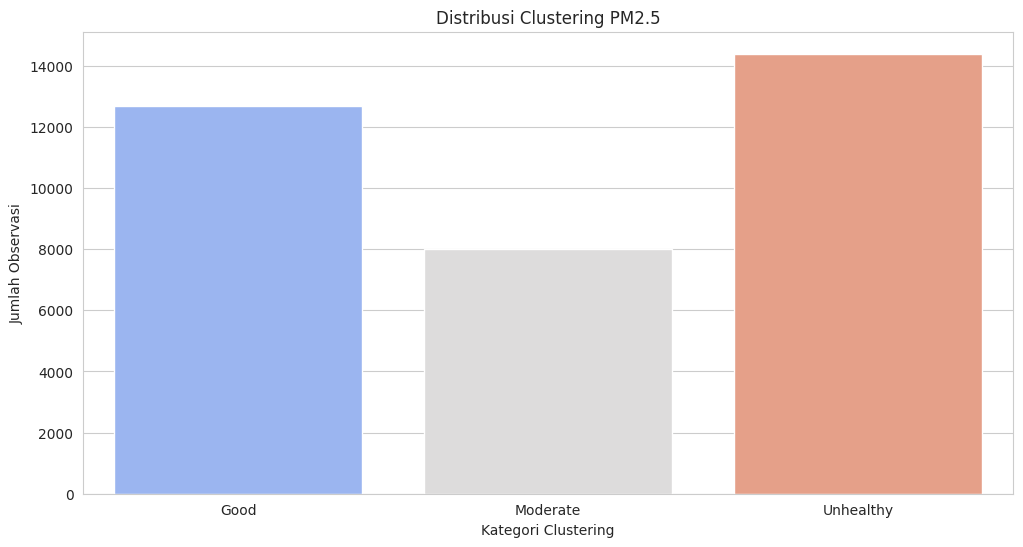

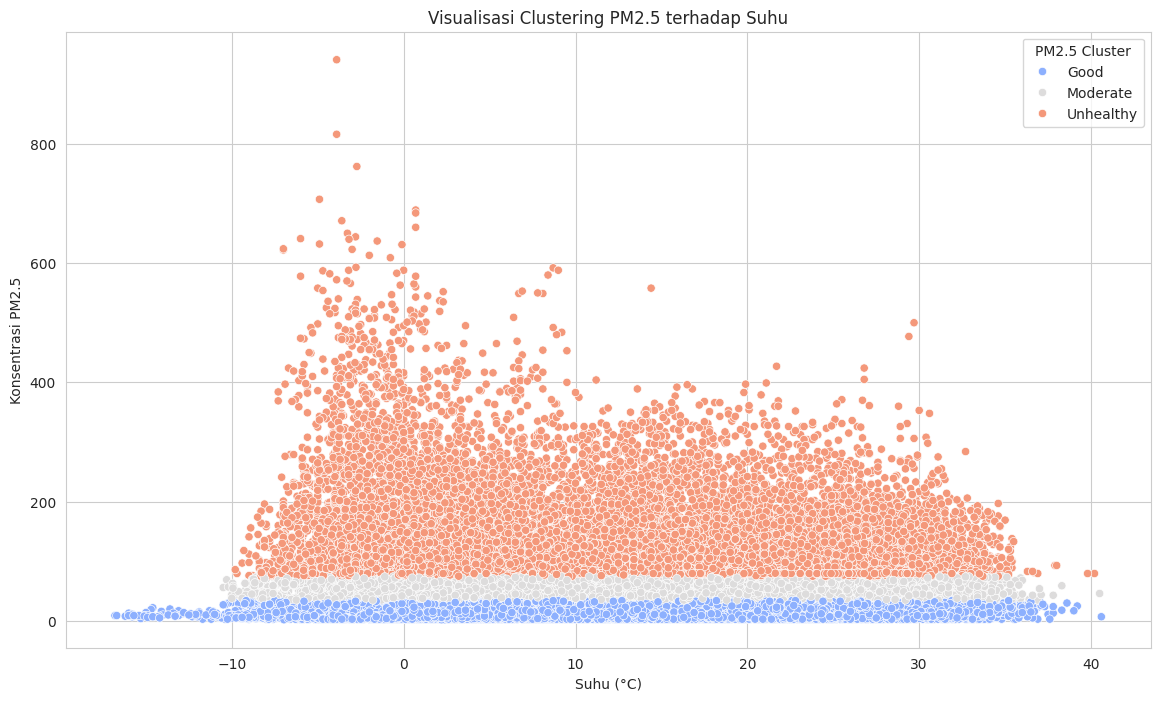

In [81]:
# Kategori clustering berdasarkan rentang nilai
def pm25_clustering(value):
    if value < 35:
        return 'Good'
    elif 35 <= value < 75:
        return 'Moderate'
    else:
        return 'Unhealthy'

# Buat kolom cluster pada dataset
data['PM2.5 Cluster'] = data['PM2.5'].apply(pm25_clustering)

# Plot visualisasi distribusi cluster
plt.figure(figsize=(12, 6))
sns.countplot(x='PM2.5 Cluster', data=data, hue='PM2.5 Cluster', dodge=False, palette='coolwarm')
plt.title('Distribusi Clustering PM2.5')
plt.xlabel('Kategori Clustering')
plt.ylabel('Jumlah Observasi')
plt.legend([],[], frameon=False)  # Sembunyikan legenda jika tidak diperlukan
plt.show()

# Visualisasi scatter plot untuk melihat distribusi cluster terhadap suhu
plt.figure(figsize=(14, 8))
sns.scatterplot(x='TEMP', y='PM2.5', hue='PM2.5 Cluster', data=data, palette='coolwarm')
plt.title('Visualisasi Clustering PM2.5 terhadap Suhu')
plt.xlabel('Suhu (°C)')
plt.ylabel('Konsentrasi PM2.5')
plt.show()

**Insight:**
- Pengelompokan ini membantu mengidentifikasi kategori kualitas udara yang paling sering terjadi

## Conclusion

- Faktor lingkungan seperti suhu mungkin memiliki pengaruh pada konsentrasi PM2.5.
- Tren kualitas udara menunjukkan adanya pola musiman pada waktu-waktu tertentu.